# Importing Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import pandas as pd
train_raw_data=pd.read_csv('BBC News Train.csv')

In [10]:
test_data=pd.read_csv('BBC News Test.csv')

In [11]:
correct_data=pd.read_csv('BBC News Sample Solution.csv')

In [13]:
print("Training raw data\n")
print(train_raw_data.head())

Training raw data

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


In [14]:
print("Test raw data\n")
print(test_data.head())

Test raw data

   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...


In [15]:
print("Correct data\n")
print(correct_data.head())

Correct data

   ArticleId       Category
0       1018          sport
1       1319           tech
2       1138       business
3        459  entertainment
4       1020       politics


# **EDA**

In [16]:
print(train_raw_data['Category'].unique())

['business' 'tech' 'politics' 'sport' 'entertainment']


In [17]:
print(train_raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


In [18]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None


In [19]:
print(correct_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None


In [21]:
# Count the duplicated values in the 'Text' column
duplicated_text_count = train_raw_data.duplicated(subset=['Text']).sum()

# Count the duplicated values based on both 'Text' and 'User_Review'.
# If the counts are the same as above,those duplicates have consistent 'User_Review'
duplicated_textcat_count = train_raw_data.duplicated(subset=['Text', 'Category']).sum()

# Print the counts
print(f'There are {duplicated_text_count} rows with the same texts in the training data.')
print(f'There are {duplicated_textcat_count} rows with the same texts and user in the training data.')

duplicates = train_raw_data[train_raw_data.duplicated(subset=['Text'], keep=False)].sort_values(by='Text')
print( duplicates.head(6) )

There are 50 rows with the same texts in the training data.
There are 50 rows with the same texts and user in the training data.
      ArticleId                                               Text  \
494        1326  ask jeeves joins web log market ask jeeves has...   
228        1098  ask jeeves joins web log market ask jeeves has...   
1430       1042  aviator  creator  in oscars snub the man who s...   
695         374  aviator  creator  in oscars snub the man who s...   
443        1847  blind student  hears in colour  a blind studen...   
1317        145  blind student  hears in colour  a blind studen...   

           Category  
494            tech  
228            tech  
1430  entertainment  
695   entertainment  
443            tech  
1317           tech  


Samples in training data after moving duplicates: 1440


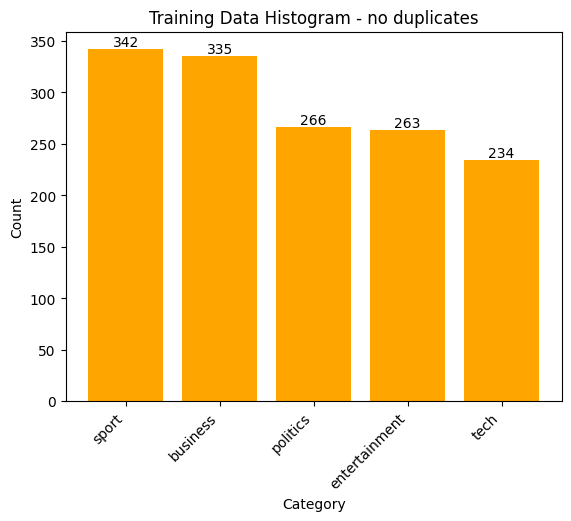

In [22]:
# Remove duplicates
train = train_raw_data.drop_duplicates(subset=['Text'])

# Check train data counts. Originally training data has 1490 rows and 50 rows should be dropped.
print(f'Samples in training data after moving duplicates: {train.shape[0]}')

category_counts = train['Category'].value_counts()
plt.bar(category_counts.index, category_counts, color='orange')
plt.title('Training Data Histogram - no duplicates')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
def plot_top_frequency(train,lower,upper):
    corpus = train['Text']

    # Tokenize the corpus into words
    tokens = [word for sentence in corpus for word in sentence.lower().split()]

    # Count word frequencies
    word_counts = Counter(tokens)

    # Sort the word counts in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Get the top 60 frequent words
    top_words = sorted_word_counts[lower:upper]

    # Create a pandas DataFrame
    df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(df['Word'], df['Frequency'])
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency Counts')
    plt.title(f'Frequency Counts - Top {lower} to {upper} Frequent Words')
    plt.tight_layout()
    plt.show()

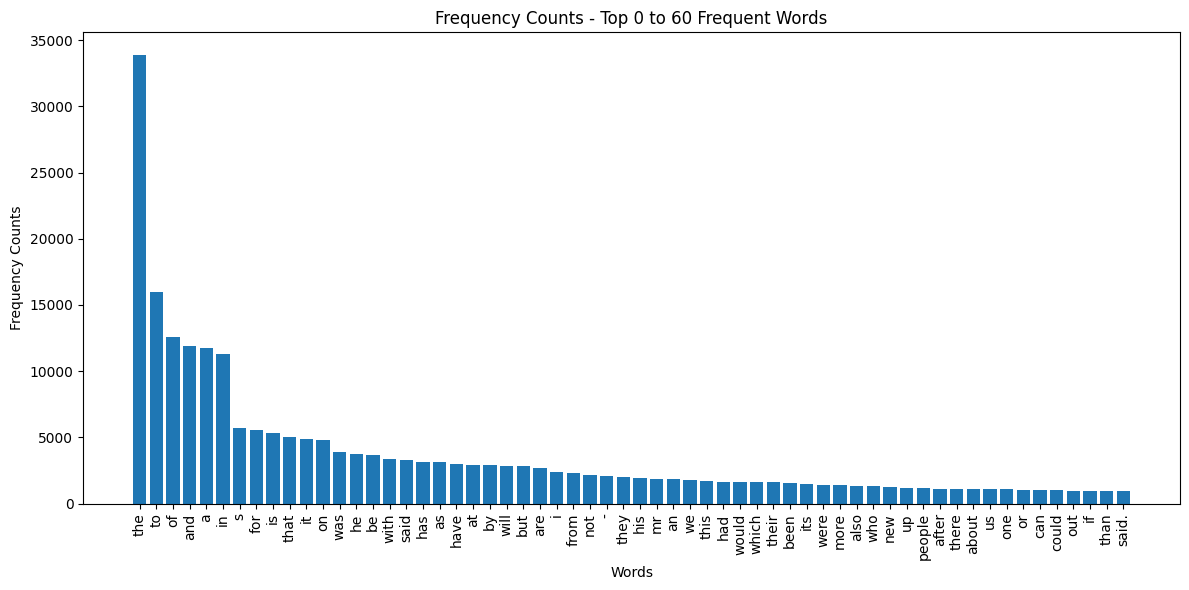

In [24]:
plot_top_frequency(train,0,60)

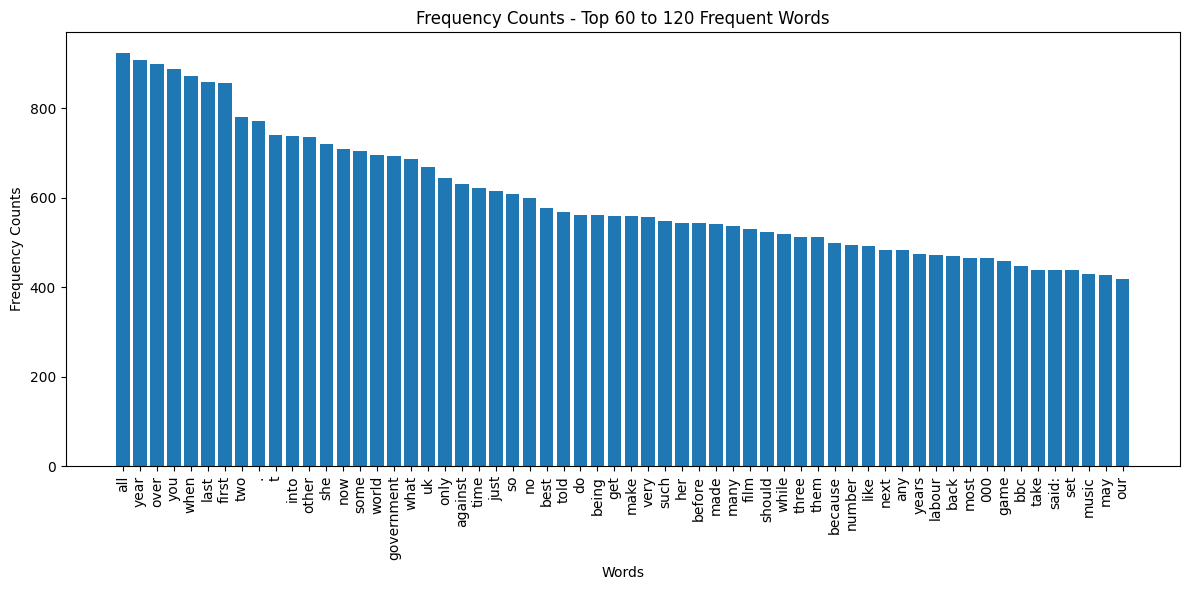

In [25]:
plot_top_frequency(train,60,120)

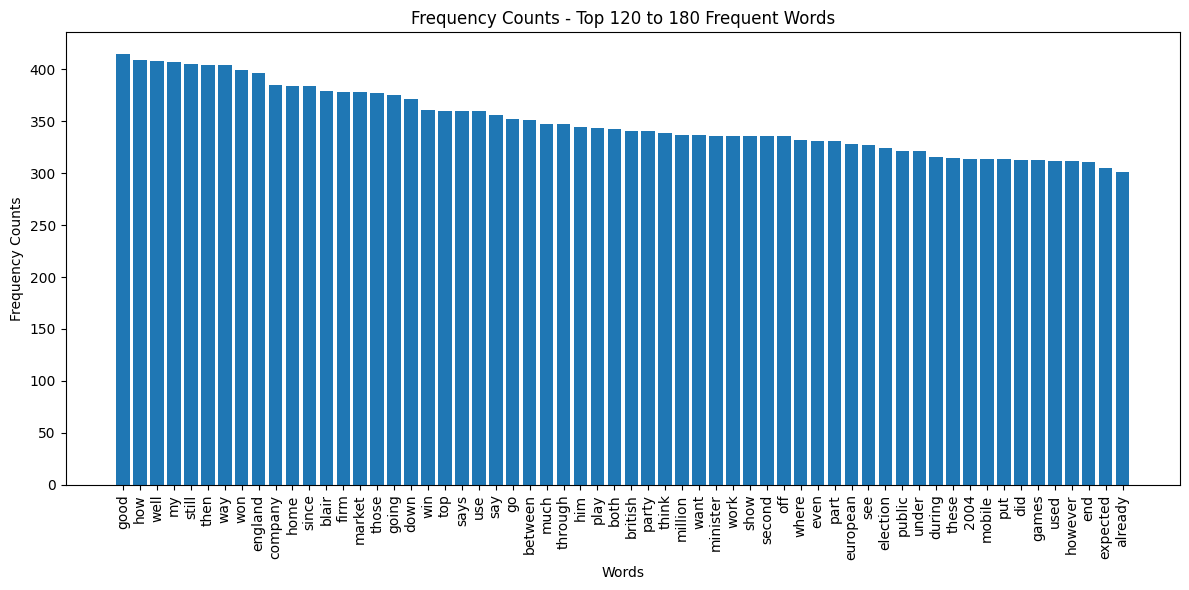

In [26]:
plot_top_frequency(train,120,180)

In [27]:
def text_preprocessing(df):
    """
    This function does in place replacement of data so it won't return anything
    """
    # convert to lower cases
    df['Text']=df['Text'].str.lower()

    # remove punctuation
    df['Text'] = df['Text'].apply(lambda doc: re.sub(r'[^\w\s]+', '', doc))

    # remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    df['Text'] = df['Text'].apply(lambda doc: ' '.join([word for word in doc.split() if word not in (stop_words)]))

    # remove extra spaces
    df['Text'] = df['Text'].apply(lambda doc: re.sub(' +', ' ', doc))

    # stemming
    porter_stemmer = PorterStemmer()
    df['Text'] = df['Text'].apply(lambda doc:  [porter_stemmer.stem(word) for word in word_tokenize(doc) ])
    df['Text'] = df['Text'].apply(lambda words: ' '.join(words))

# take a look at text 0
train_copy = train.copy()
print('1st text before preprocessing: \n',train_copy['Text'][0])
text_preprocessing(train_copy)
print('\n1st text after preprocessing: \n',train_copy['Text'][0])

1st text before preprocessing: 
 worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and pr

In [28]:
# Create empty lists to store text values for each category
sport_texts = []
category_mapping = {
    'sport': [],
    'tech': [],
    'business': [],
    'politics': [],
    'entertainment': []
}

# Iterate through the dataset
for index, row in train_copy.iterrows():
    category = row['Category']
    text = row['Text']
    category_mapping[category].append(text)

for category, texts in category_mapping.items():
    print("Number of texts in '{}' category:".format(category), len(texts))


Number of texts in 'sport' category: 342
Number of texts in 'tech' category: 234
Number of texts in 'business' category: 335
Number of texts in 'politics' category: 266
Number of texts in 'entertainment' category: 263


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
def plot_category_frequency(category_mapping,lower,upper,category):
    corpus=category_mapping[category]

    # Tokenize the corpus into words
    tokens = [word for sentence in corpus for word in sentence.lower().split()]



    # Count word frequencies
    word_counts = Counter(tokens)

    # Sort the word counts in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Get the top 60 frequent words
    top_words = sorted_word_counts[lower:upper]

    # Create a pandas DataFrame
    df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(df['Word'], df['Frequency'])
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency Counts')
    plt.title(f'Frequency Counts - Top {lower} to {upper} Frequent Words for {category}')
    plt.tight_layout()
    plt.show()

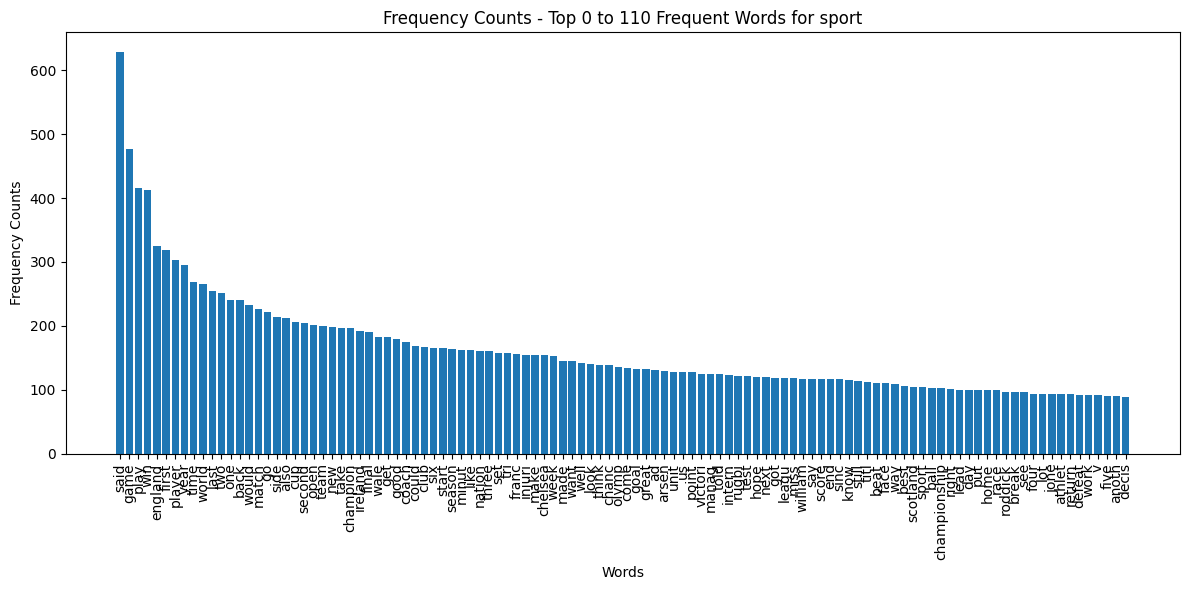

In [30]:
plot_category_frequency(category_mapping,0,110,'sport')

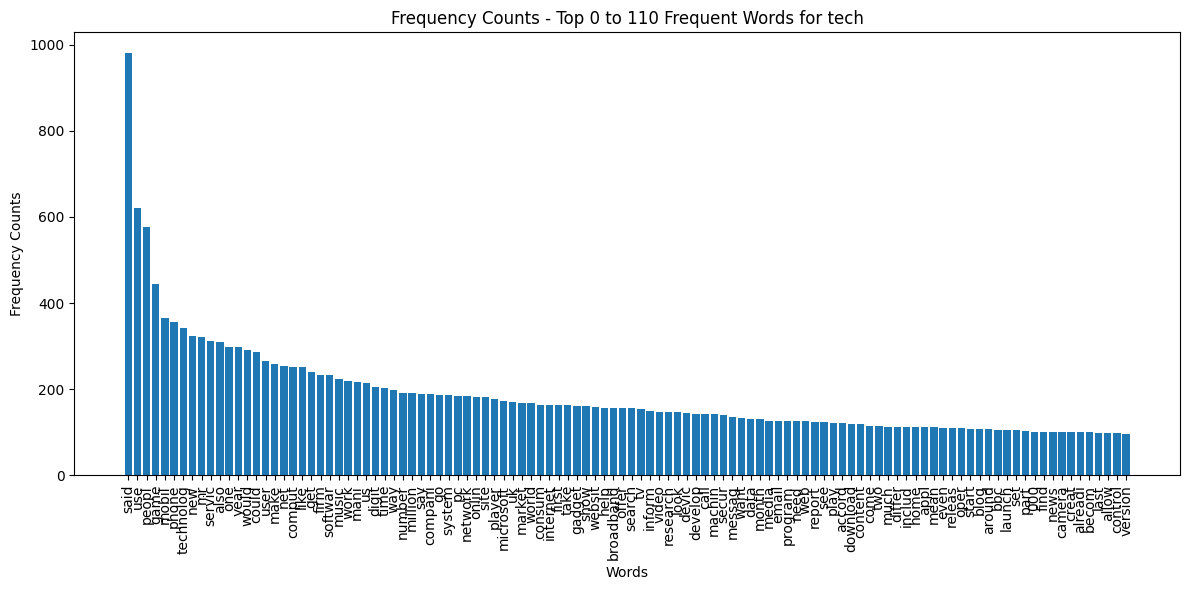

In [31]:
plot_category_frequency(category_mapping,0,110,'tech')

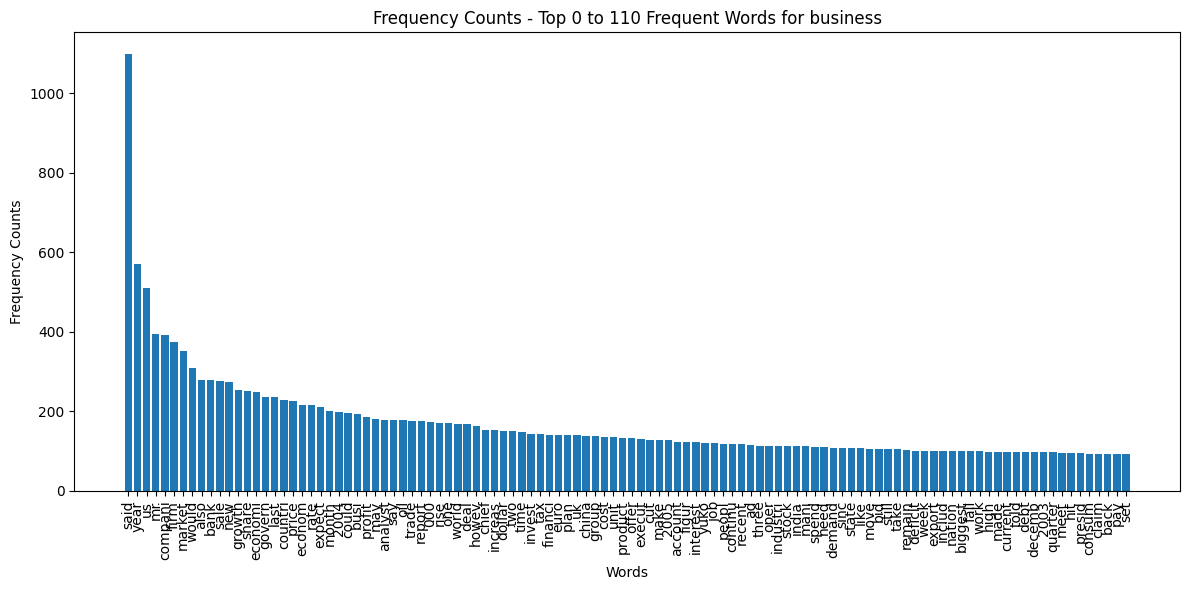

In [32]:
plot_category_frequency(category_mapping,0,110,'business')

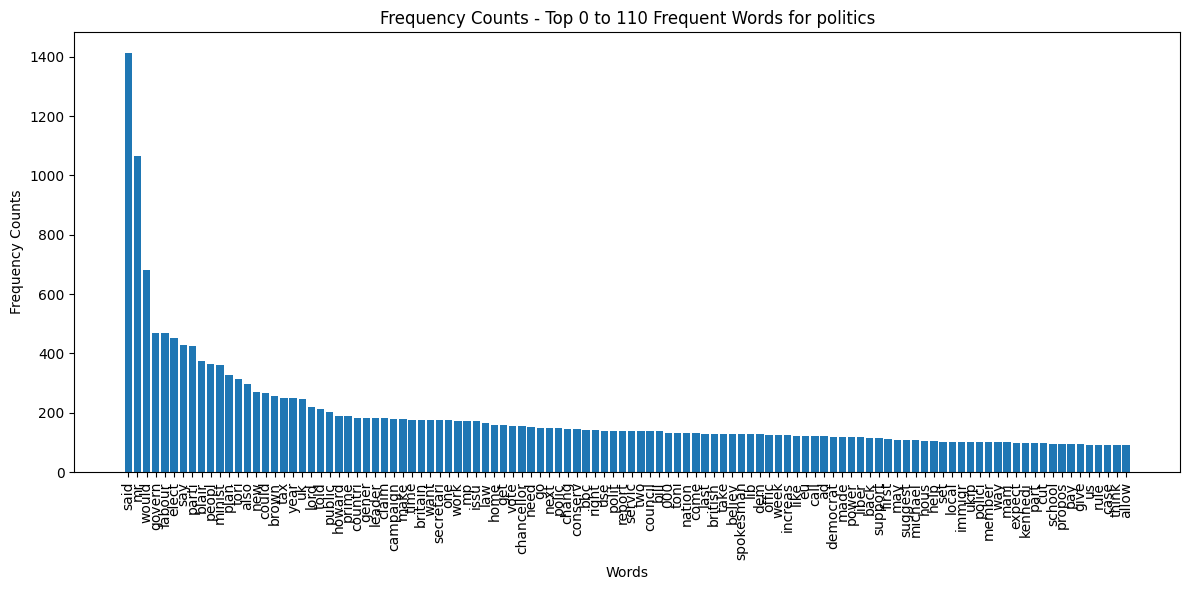

In [33]:
plot_category_frequency(category_mapping,0,110,'politics')

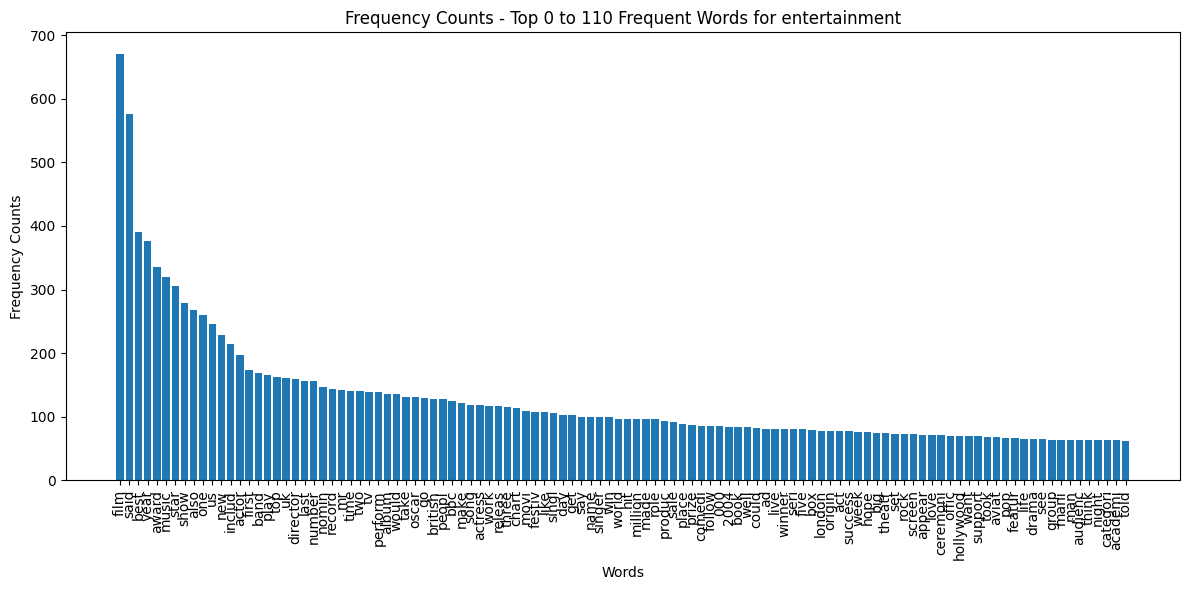

In [34]:
plot_category_frequency(category_mapping,0,110,'entertainment')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.3+ KB


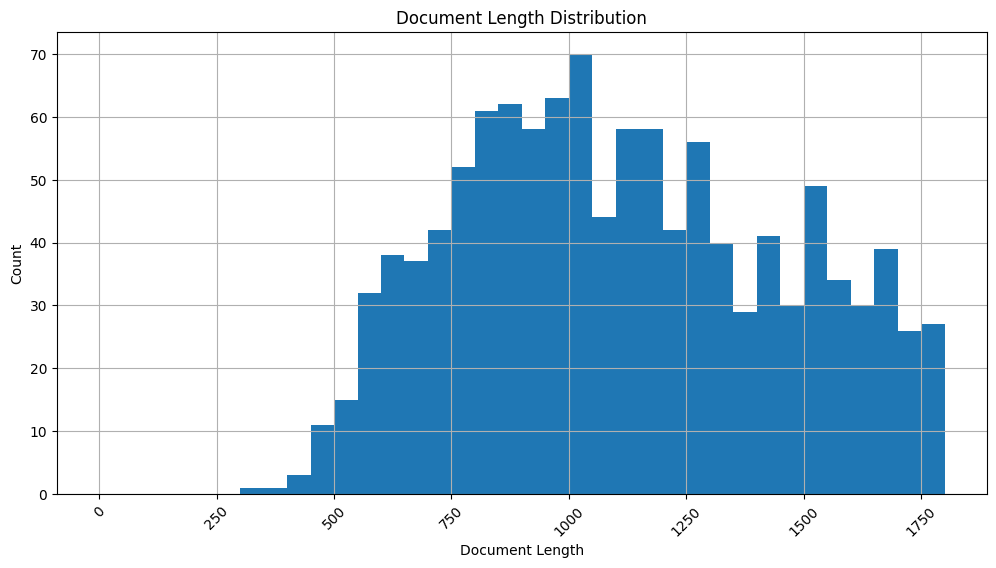

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = train_copy

# Assuming your dataset has a column named 'Text'
doc_lengths = df['Text'].apply(len)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of document lengths
doc_lengths.hist(bins=range(0, 1801, 50), ax=ax)

# Set labels and title
ax.set_xlabel('Document Length')
ax.set_ylabel('Count')
ax.set_title('Document Length Distribution')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

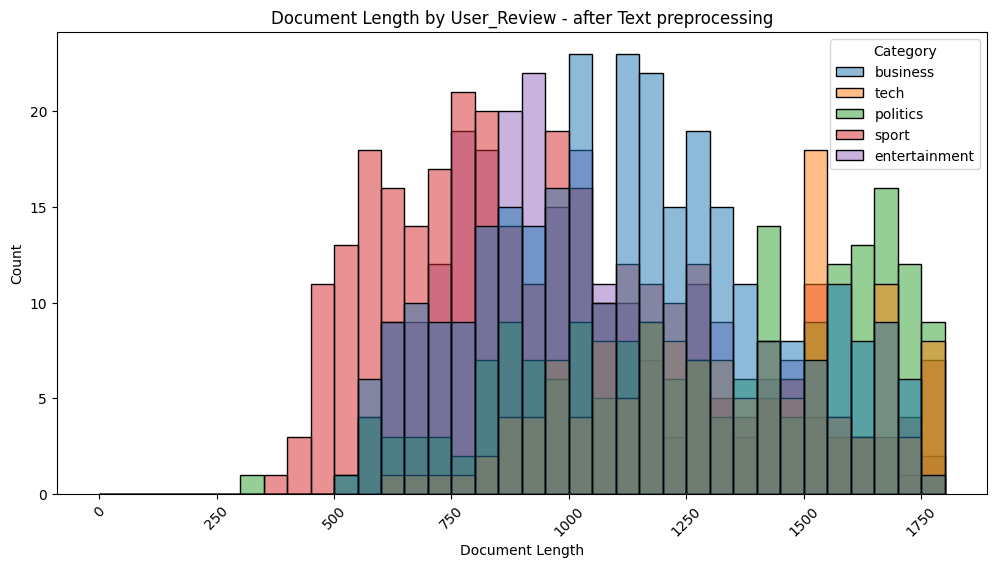

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = train_copy

# Assuming your dataset has a column named 'Text' and 'User_Review'
doc_lengths = df['Text'].apply(len)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of document lengths separated by 'User_Review' values
sns.histplot(data=df, x=doc_lengths, hue='Category', bins=range(0, 1801, 50), ax=ax)

# Set labels and title
ax.set_xlabel('Document Length')
ax.set_ylabel('Count')
ax.set_title('Document Length by User_Review - after Text preprocessing')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

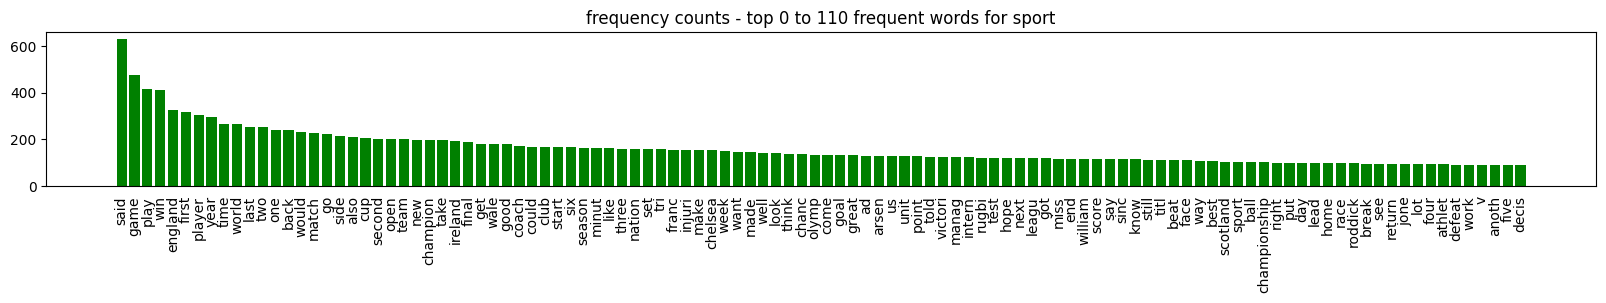

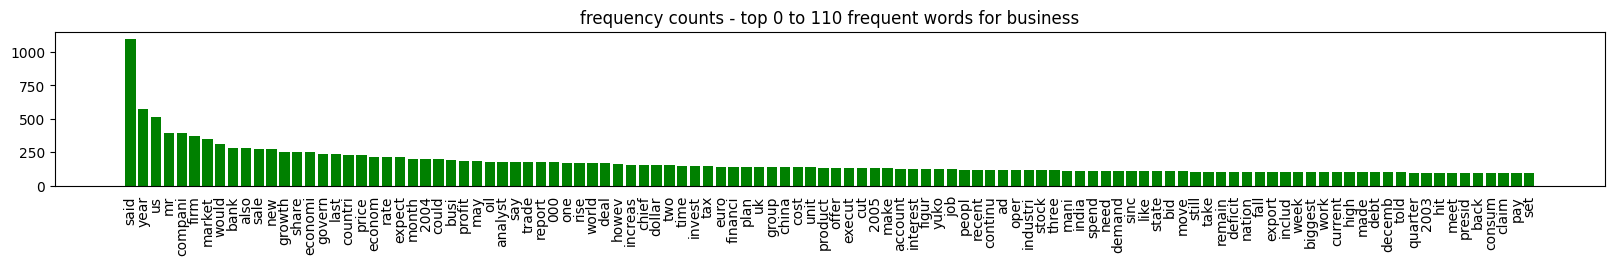

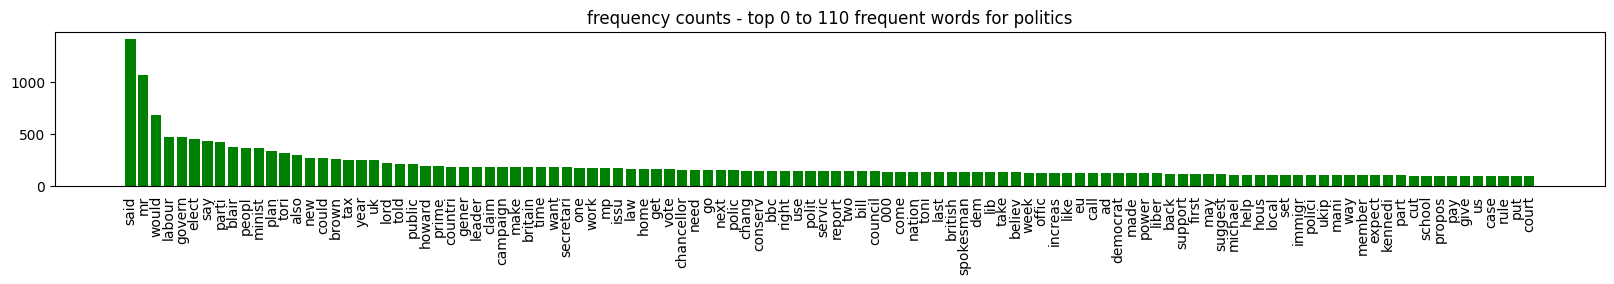

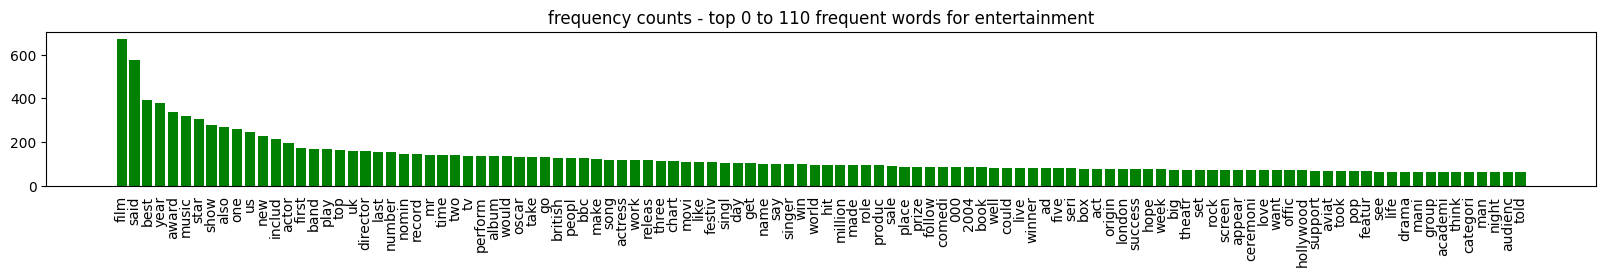

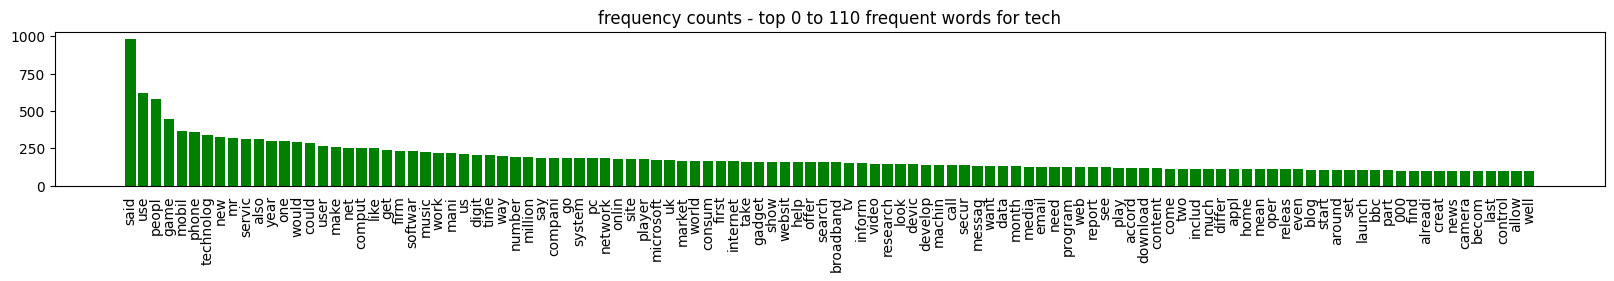

In [38]:
# plot top 110 frequent words in each category after some word preprocessing
def frequency_plot(df ,start,end, Category):
    df_topic=df[df['Category']== Category]
    frequency = df_topic['Text'].str.split().explode().value_counts()

    frequency = frequency[start:end]
    plt.figure(figsize=(20,2))
    plt.bar(frequency.index, frequency, color = 'green')
    plt.title(f'frequency counts - top {start} to {end} frequent words for {Category}')
    plt.xticks(ticks=frequency.index,rotation=90, labels=frequency.index)
    plt.tick_params(axis='x', which='both', bottom=False, top=False)
    plt.show()

frequency_plot(train_copy,0,110,'sport')
frequency_plot(train_copy,0,110,'business')
frequency_plot(train_copy,0,110,'politics')
frequency_plot(train_copy,0,110,'entertainment')
frequency_plot(train_copy,0,110,'tech')

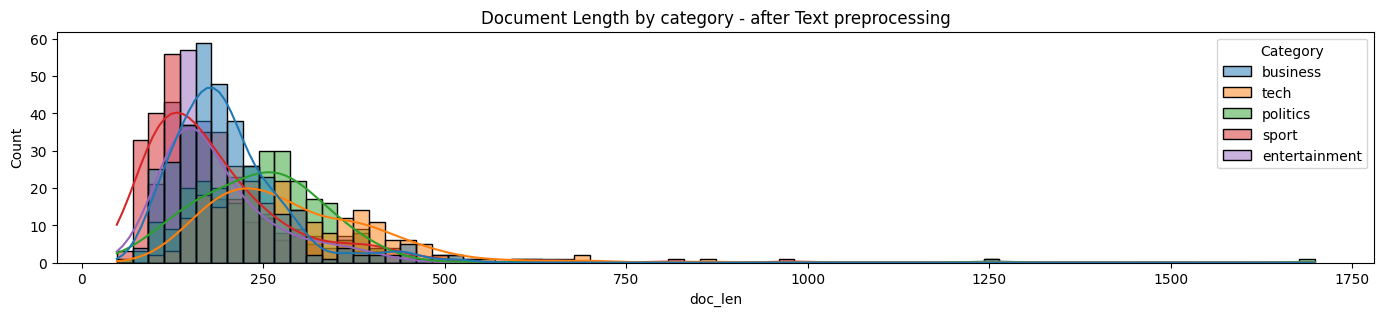

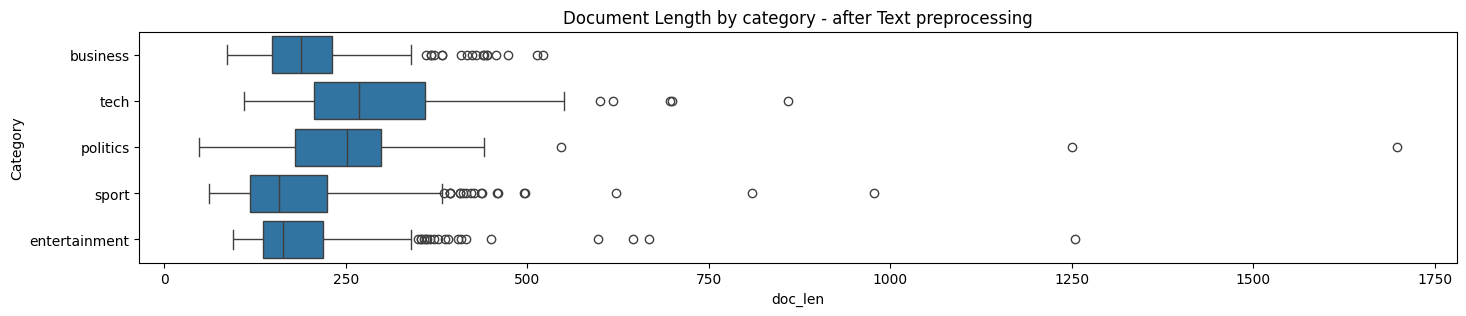

In [39]:

import seaborn as sns
# Get document lengths
train_copy['doc_len'] = train_copy['Text'].apply(lambda words: len(words.split()))

# Historgram by category
fig, ax = plt.subplots(figsize=(17, 3))
sns.histplot(
    data = train_copy,
    x = 'doc_len',
    kde=True,
    hue = 'Category'
    ).set(
        title = 'Document Length by category - after Text preprocessing');

# boxplot by category
fig, ax = plt.subplots(figsize=(17, 3))
sns.boxplot(
    data = train_copy,
    x = 'doc_len',
    y = 'Category',

    ).set(
        title = 'Document Length by category - after Text preprocessing');

In [40]:
# Label Permutation
def predict(df,yp, n=5,label_portion=1): #should probably call this function label_permutation but let's leave it as it is for now
    """
    input
    df: DataFrame
    yp: dimension (1440 *5). training size (no dup) * class. It's in indices order already from call in NMF output!! numpy format,
    n: number of labels. (would always to 5 for this project). integer

    return
    best_ypred: list of predication using permutation that produce best accuracy, note it's in indices order!! list format
    best_label_mapping_yp: dictionary that map unsupervise learning labels to ground truth labels, dictionary format
    best_accuracy: accuracy from permutation that produce best accuracy, list format, float format
    """
    # labeled sample size
    #yt
    yt=df['Category']

    if label_portion != 1:
        np.random.seed(1)
        sample_size = int(label_portion * df.shape[0])
        rows = np.random.choice(np.arange(df.shape[0]), sample_size  )
        yt=yt.iloc[rows]

    # yp transfer
    yp = np.argmax(yp, axis=1) # Now yp is np array also

    if label_portion !=1:
        yp= yp[rows]

    # intialize several parameters
    best_accuracy=float('-inf')
    best_permutation=()
    best_label_mapping_yp = {}
    best_ypred=[]
    permutations=list(itertools.permutations(np.arange(n))) # a list of size n tuples

    # get actual 'Category' ['business', 'tech', 'politics', 'sport', 'entertainment']
    unique_labels= yt.unique()

    # map 'numerical labels' to 'Category': Ex:  {0: 'business', '1: 'tech', 2: 'politics', 3: 'sport', : 'entertainment'}
    label_mapping_yt = {i: label  for i,label in enumerate(unique_labels)}

    for permutation in permutations:
        label_mapping_yp = {perm:  label_mapping_yt[i]  for  i,perm in enumerate(list(permutation))}
        yp_gt = [label_mapping_yp[y] for y in yp] # transfer to ground truth label
        accuracy = (yt==yp_gt).sum()/len(yt)
        # update to keep the best accuracy permutation
        if accuracy> best_accuracy:
            best_permutation = permutation
            best_accuracy=accuracy
            best_ypred = yp_gt
            best_label_mapping_yp = label_mapping_yp

    return (best_ypred ,best_label_mapping_yp, best_accuracy)

In [41]:
# Function for NMF training
def MF_training(df, min_df=0.0, max_df = 1.0, norm='l1', stop_words = None, ngram_range= (1,1), l1_ratio =0.0, label_portion =1 ):
        """
        This function is for NMF training. It has text preprocessing, tfidf, and NMF.

        Input:
        df: df is training data. df has default size to be the same size of training data (minus duplicates). Data frame format.
        label_portion: portions of labels for label permutation. Can set to be less than 1 for NMF but has to be 1 for supervised model. float format

        return:
        y_pred_train_labeled_data: list of predications only on labeled data! list format
        label_mapping_yp: dictionary that map unsupervise learning labels to ground truth labels, dictionary format
        tfidf, nmf: trained models
        accuracy: accuracy only on labeled data (so for NMF, if we include 1% of labels. the accuracy is only those small part of labeled data)!! float format

        """
        # Text preprocess
        text_preprocessing(df)

        # TFIDF model
        tfidf = TfidfVectorizer(
                                 min_df = min_df,
                                 max_df = max_df,
                                 norm = norm,
                                 stop_words =stop_words,
                                 ngram_range = ngram_range)
        tfidf_train = tfidf.fit_transform(df['Text'])

        # NMF model
        nmf = NMF(n_components=5,
                        init='nndsvda',
                        solver = 'mu',
                        beta_loss = 'kullback-leibler',
                        l1_ratio = l1_ratio,
                        random_state = 1)
        nmf_train = nmf.fit_transform(tfidf_train) #nmf_train is a np array of dimension (1440*5)

        # Transform unsupervised learning labels to ground truth labels
        y_pred_train_labeled_data , label_mapping_yp , labeled_data_accuracy = predict(df=df, yp=nmf_train, label_portion=label_portion)

        print(f'training accuracy on labeled portion ({label_portion}) of data is:', labeled_data_accuracy)

        return labeled_data_accuracy, tfidf, nmf, label_mapping_yp, y_pred_train_labeled_data


In [42]:
# function to predict testing data
def predict_data(df,tfidf, nmf, label_mapping_yp ):
    # predict testing data
    text_preprocessing(df)
    tfidf = tfidf.transform(df['Text'])
    nmf = nmf.transform(tfidf)
    y_pred = np.argmax(nmf, axis=1)
    y_pred = [label_mapping_yp[y] for y in y_pred]
    return y_pred

# function to submit results
def submit_result(y_pred_test):
    test_pred = pd.DataFrame(columns=['ArticleId', 'Category'])
    test_pred['ArticleId'] = test_data['ArticleId']
    test_pred['Category'] = y_pred_test

    #save and submit test dataframe
    try:
        test_pred.to_csv('submission.csv', index=False)
    except:
        pass


In [43]:
# Training with the model (first try with no tuning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import itertools
import numpy as np
train_copy = train.copy()
train_accuracy, tfidf, nmf, label_mapping_yp, ypred_train_no_tune = MF_training(train_copy, label_portion =1)

training accuracy on labeled portion (1) of data is: 0.9291666666666667


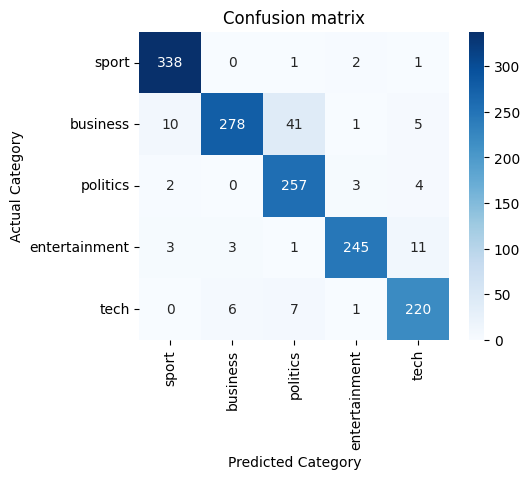

In [44]:
# Since the data isn't perfectly balanced. Let't take a look at the confusion matric.
from sklearn.metrics import confusion_matrix

# Confusion matrix function
def plot_conf_matrix(yt, yp, label_order= ['sport','business','politics','entertainment','tech'] ):
        cfm = confusion_matrix(yt,yp,labels =label_order)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cfm, annot=True, fmt='.0f',cmap='Blues',xticklabels=label_order, yticklabels=label_order)
        plt.xlabel('Predicted Category')
        plt.ylabel('Actual Category')
        plt.title('Confusion matrix')
        plt.show()

# Plot
plot_conf_matrix(train['Category'],ypred_train_no_tune )

In [45]:
# Train testing data and submit the results
test_copy = test_data.copy()
y_pred_test =  predict_data(test_copy,tfidf, nmf, label_mapping_yp )
submit_result(y_pred_test)

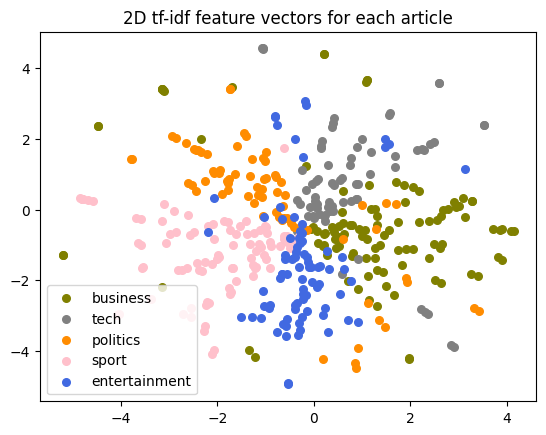

In [47]:
# t-SNE for feature vector visualization
from sklearn.manifold import TSNE

feature_vecs = tfidf.fit_transform(train_copy['Text']).toarray()
# Choose subset of features (because t-SNE is computationaly expensive)
sample_size = int(len(feature_vecs) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(feature_vecs)), size=sample_size, replace=False)

# t-SNE
lowd_features = TSNE(n_components=2, random_state=1).fit_transform(feature_vecs[indices])
colors = [ 'pink', 'darkorange','olive', 'royalblue', 'gray',]
for label_id, category in label_mapping_yp.items():
    points = lowd_features[(train_copy['Category'].iloc[indices]== category).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[label_id], label=category)
plt.title("2D tf-idf feature vectors for each article")
plt.legend()